# Fire's in Pittsburgh
## Below is a collection of data and analysis that determines how dangerous it is for 
## you to live there.

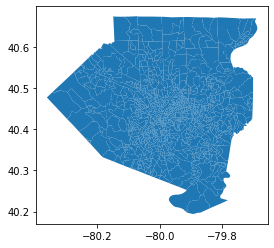

In [15]:
import geopandas as geopandas
import pandas as pandas
import matplotlib.pyplot as plt

map = geopandas.read_file("Shapes/Allegheny_County_Census_Block_Groups_2016.shp")
map.plot()


So the first thing that I decided to do was load in a basic GeoPanda of the area to get a general outline of the area. Soon we will load in our fires so we can get a general understanding of where in Alleghany county we should be looking. 

(-80.39448204221948, -79.6551586277836, 40.170321322082884, 40.6989726150925)

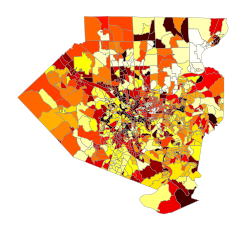

In [2]:
map.plot(cmap='hot', linewidth=0.3, edgecolor='0.5', legend = True)
plt.axis('off')

Then I decided to load in our fire data into our shapes, and run the code using the Inferno colorscheme. This way we can get a basic understanding before truly diving into our code.

In [3]:
df = pandas.read_csv('fire.csv')
df.head()

,call_id_hash,service,priority,priority_desc,call_quarter,call_year,description_short,city_code,city_name,geoid,census_block_group_center__x,census_block_group_center__y
0,000015F42010D7E9BFD0478A34A274,Fire,F1,Potential to become a threat to life safety.,Q4,2019,NATURAL GAS ISSUE,WBG,WILKINSBURG,4.200356e+14,-79.875531,40.443989
1,00021C3CC2642C0843EECEEDDCEBDA,Fire,Q1,EMS ALS life threatening response,Q2,2018,EMS CALL/ASSIST,PGH,PITTSBURGH,4.200327e+14,-80.031346,40.463178
2,000388BD0E2E1C493226DEB18A44E9,Fire,Q0,EMS ALS life threatening response w/ backup,Q3,2019,EMS CALL/ASSIST,PGH,PITTSBURGH,4.200308e+14,-79.934916,40.460684
3,000460CED4F90098D1E6788565AA35,Fire,Q1,EMS ALS life threatening response,Q3,2017,EMS CALL/ASSIST,PGH,PITTSBURGH,4.200302e+14,-79.993440,40.447701
4,00055108E15C5F3527D6606B1F06AD,Fire,F2,Incidents actively occurring or that has just ...,Q1,2016,WIRES FIRE/ARCING/UNK DANGER,BWB,BALDWIN BORO,4.200348e+14,-79.967189,40.397455


Next up I decided that I would load in the head of the CSV file given by the database, and get a little sneak peak into the formatting of the database provided. It showed me the basic layout, and allowed me to plan on how I was going to extract the data from the CSV. We ran into a problem :(. I realized that the dataset was ALL of Alleghany county. But I remembered that the shapes had a much more in depth neighborhood by neighborhood view. 

It was time for recovery. I needed to pare down the CSV file to include only Pittsburgh and then use GeoID to figure out what neighborhood was what. This was going to be painful.

In [4]:
pf = pandas.read_csv('geoID.csv')
pf.head()

,geoid
0,420033000000000
1,420031000000000
2,420030000000000
3,420031000000000
4,420031000000000


So now we have a really fun job to do. We need to figure out through the GeoID's which neighorhood begins with which ID. Time to go to the internet. 

![no time](https://media.tenor.co/images/f40cf74063d462f5f3814f14b4e4c545/raw)

Taking a look at these geoID's, the only values that really matter are the first 6. We are going to borrow another dataset to view the GeoID's and match them to neighborhoods manually.

Through our data analysis we were able to make this equivalency below:
DISTRICTS SEPERATED INTO POLITICAL JURISDICTIONS
- 420032 - Northside
- 420031 - Beechview
- 420035 - Arlington Heights
- 420033 - Overbrook area
- 420036 - Squirrel Hill South 
- 420030 - Oakland Area
- 420034  - Westwood Area

Now, the westwood general area is so small we are going to add it to it's neighboring area Arlington Heights and then add that to the Overbrook area as they are all extremely small neighborhoods.

In [16]:
from random import sample
from collections import Counter

pf['geoid'].value_counts()

420031000000000    99767
420032000000000    59775
420033000000000    53870
420030000000000    47695
420036000000000    42449
420040000000000    12254
420035000000000      320
420034000000000        7
Name: geoid, dtype: int64

![data](https://j.gifs.com/Kd0Mo2.gif)

It's time for us to come up with some meaningful data.

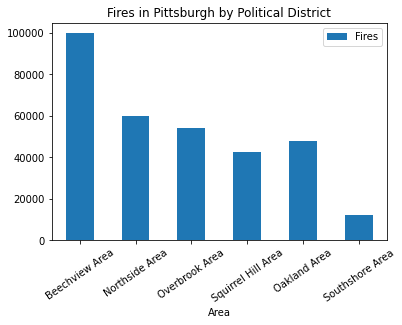

In [4]:
data = [['Beechview Area', 99767], ['Northside Area', 59775] ,['Overbrook Area', 54197], ['Squirrel Hill Area', 42449],  ['Oakland Area', 47695], ['Southshore Area', 12254]]
firesDf = pandas.DataFrame(data, columns = ['Area', 'Fires'])
firesDf.plot.bar(x="Area", y="Fires", rot=35, title="Fires in Pittsburgh by Political District");

OK. We have finally come up with some meaningful visualization of the fires within the City of Pittsburgh. It's time for us to go neighborhood by neighborhood and split up the amounts based off of the populations within each district on the map.

Ok. Time to break up this area into population data.

12254
Southshore:
TOTAL POPULATION: 14,235 
Fairywood: 1,002 = 862
Windgap: 2,270 = 1,954
East Carnagie: 570 = 491
Greentree: 4,885 = 4,205
West End: 415 = 357
Elliot: 2,381 = 2,044
Crafton Heights: 2,411 = 2,075
Espelen: 301 = 259

99767
Beechview:
TOTAL POPULATION: 76,239
South shore: 19 - 25
Mount washington: 14,567 - 19,062
Beltzhoover: 1,925 - 2,519
Bon air: 18,052 - 23,623
Carrick: 7,698 - 10,074
Overbrook: 800 - 1,046
Brookline: 13,214 - 17,292
Knoxville: 3,747 - 4,903
Southside flats: 6,736 - 8,814
Southside slopes: 4,288 - 5,611
Mount oliver: 3,324 - 4,350
Arlington: 1,869 - 2,445

54197
Overbrook:
TOTAL POPULATION: 13,776
Hays: 5,242 - 20,622
Hazelwood: 4,317 - 16,983
Glen Hazel: 716 - 2,816
New Homestead: 990 - 3,895
Lincoln Place: 3,227 - 12,695

42449
Squirrel Hill:
TOTAL POPULATION:115,030
Squirrel Hill: 11,363 - 4,193
Greenfield: 7,294 - 2,691
Swisshelm park: 1,361 - 502
Regent square: 928 - 342
Point breeze: 5,315 - 1961
Shadyside: 14,317 - 5,283
Homewood:3,280 - 1,210
East hills: 3,169 - 1,170
Bloomfield: 8,442 - 3,115
Friendship: 1,785 - 658
East liberty: 5,869 - 2,166
Garfield: 3,675 - 1,356
Lawrenceville: 4,482 - 1,653
Stanton heights: 3,012 - 1,112
Morningside: 29,460 - 10,871
Highland park: 6,395 - 2,359
Lincoln-Larmier: 4,883 - 1,801

59775
Northside:
TOTAL POPULATION:24,573
Brighton Heights: 7,247 - 17,629
Marshall Shadeland: 6,043 - 14,700
Manchester: 2,130 - 5,181
North shore: 303 - 739
Troy hill: 2,714 - 6,602
Spring garden: 884 - 2,150
Kirkbride: 601 - 1,461
Observatory hill: 4,050 - 9,851

47695
Oakland:
TOTAL POPULATION: 23,368
Downtown: 4,896 - 9,992
Uptown: 5,882 - 12,005
Strip district: 616 - 1,257
Polish hill:1,274 - 2,600
Hill district: 2,057 - 4,198
Oakland: 8,663 - 17,681


![math](https://thumbs.gfycat.com/WideeyedHastyCrane-max-1mb.gif)

Time to finally make data that my team can use. ``Lets get it done``.

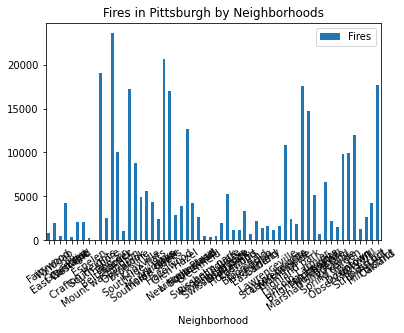

In [33]:
finalized = [['Fairywood', 862], ['Windgap', 1954] ,['East Carnagie', 491], ['Greentree', 4205],  ['West End', 357], ['Elliot', 2044], ['Crafton Heights', 2075], ['Espelen', 259], ['South shore', 25], ['Mount washington', 19062], ['Beltzhoover', 2519],['Bon air', 23623],['Carrick', 10074],['Overbrook', 1046], ['Brookline', 17292],['Southside flats', 8814],['Knoxville', 4903],['Southside slopes', 5611],['Mount oliver', 4350],['Arlington', 2445],['Hays', 20622],['Hazelwood', 16983],['Glen Hazel', 2816],['New Homestead', 3895],['Lincoln Place', 12695],['Squirrel Hill', 4193],['Greenfield', 2691],['Swisshelm park', 502],['Regent square', 342],['Swisshelm park', 502],['Point breeze', 1961],['Shadyside', 5283],['Homewood', 1210], ['East hills', 1170],['Bloomfield', 3315],['Friendship', 658],['East liberty', 2166],['Garfield', 1356],['Lawrenceville', 1653], ['Stanton heights', 1112],['Lawrenceville', 1653],['Morningside', 10871],['Highland park', 2359],['Lincoln-Larmier', 1801], ['Brighton Heights', 17629],['Marshall Shadeland', 14700],['Manchester', 5181],['North shore', 739],['Troy hill', 6602],['Spring garden', 2150],['Kirkbride', 1461],['Observatory hill', 9851],['Downtown', 9992],['Uptown', 12005],['Strip district', 1257],['Polish hill', 2600],['Hill district', 4198],['Oakland', 17681]]
finalizedFiresHoods = pandas.DataFrame(finalized, columns = ['Neighborhood', 'Fires'])
finalizedFiresHoods.plot.bar(x="Neighborhood", y="Fires", rot=35, title="Fires in Pittsburgh by Neighborhoods");

In [35]:
subset = finalizedFiresHoods.nsmallest(10, 'Fires')
subset.head(10)

,Neighborhood,Fires
8,South shore,25
7,Espelen,259
28,Regent square,342
4,West End,357
2,East Carnagie,491
27,Swisshelm park,502
29,Swisshelm park,502
35,Friendship,658
47,North shore,739
0,Fairywood,862


We have finally produced a new subset of our list showing the 10 places with the least number of fires.

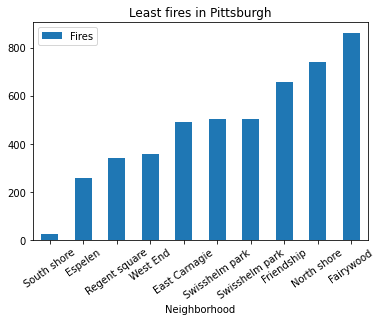

In [36]:
subset.plot.bar(x="Neighborhood", y="Fires", rot=35, title="Least fires in Pittsburgh");

# My closing remarks and reflections
The best place to live in Pittsburgh by far is the South Shore. They see the least number of fires and have a medium population as well. This makes sense in my mind, as it is away from the main area of Pittsburgh and more of a suburb to the community. This project opened my eyes to the scope of data sets and only through tedious hours of programming and doing math to calculate population density, was I able to come to a conclusion on the best places to live in Pittsburgh. In the future, I would definitely choose a smaller data set as this made the challenge of analyzing the data even harder. Overall, it was a great learning experience.

Jacob Goldstein